# Machine Learning Demo

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing

from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
%matplotlib inline
#plot within python notebook

import sys
if sys.version_info >= (3, 0):
    print("Error: You are running Python 3.x. This pynb is written in Python 2.")

## Loading The Data

In [2]:
# Load data
bc = pd.read_csv('breast-cancer.csv', header=None)



## Loading and Applying the Field/Column Names

In [3]:
header_labels = []
with open("field_names.txt") as header_labels_file:
    print "Column Headers:\n"
    for line in header_labels_file:
        header_labels.append(line.strip())
for label in header_labels:
    print label
print "\nNumber of labels loaded: %.f" %len(header_labels)

bc.columns=header_labels

Column Headers:

ID
diagnosis
radius_mean
radius_sd_error
radius_worst
texture_mean
texture_sd_error
texture_worst
perimeter_mean
perimeter_sd_error
perimeter_worst
area_mean
area_sd_error
area_worst
smoothness_mean
smoothness_sd_error
smoothness_worst
compactness_mean
compactness_sd_error
compactness_worst
concavity_mean
concavity_sd_error
concavity_worst
concave_points_mean
concave_points_sd_error
concave_points_worst
symmetry_mean
symmetry_sd_error
symmetry_worst
fractal_dimension_mean
fractal_dimension_sd_error
fractal_dimension_worst

Number of labels loaded: 32


### Checking the Results

In [4]:
print "Dataframe shape: %.f rows, %.f columns\n" % bc.shape
print "Here are the first few rows:"
bc.head(6)

Dataframe shape: 569 rows, 32 columns

Here are the first few rows:


,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Preprocessing and Data Transformation

If we look at the first few lines of data (above), or a summary of the data (below)...

In [5]:
bc.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


...there are a few things that will help us analyze this dataset. First, we should randomize our dataset since we can't assume it's already randomized. (In fact, it actually isn't well randomized.) Also, we separate the diagnosss and convert them to binary variables. And, separate the predictor variables (features), while dropping the ID column (so it's not used in our models later):

In [6]:
bc=bc.sample(frac=1,random_state=5).reset_index(drop=True)
bc_Y = pd.get_dummies(bc.diagnosis)
bc_Y = bc_Y.drop('B',1)
bc_Y.columns = ['diagnosis_M',]

bc_X = bc.drop('diagnosis', 1).drop('ID', 1)

print "Dataframe shape: %.f rows, %.f columns\n" % bc_Y.shape
print "Check first few rows of bc_Y (outcome variable):"
print bc_Y.head(5)
print "Dataframe shape (feature vars): %.f rows, %.f columns\n" % bc_X.shape
print "Check first few rows of  of bc_X (input variables):"
bc_X.head(5)

Dataframe shape: 569 rows, 1 columns

Check first few rows of bc_Y (outcome variable):
   diagnosis_M
0            1
1            0
2            0
3            0
4            0
Dataframe shape (feature vars): 569 rows, 30 columns

Check first few rows of  of bc_X (input variables):


,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,20.27,36.71,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876
1,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,...,13.58,28.68,87.36,553.0,0.1452,0.2338,0.16880,0.08194,0.2268,0.09082
2,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.1313,0.1788,0.25600,0.12210,0.2889,0.08006
3,13.30,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.20,29.20,92.94,621.2,0.1140,0.1667,0.12120,0.05614,0.2637,0.06658
4,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,...,13.03,31.45,83.90,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626


Next, it will help us if we normalize the variables so we can later compare their weights (or variable coefficients, in a linear regression) to see which are more important. We can quickly see a summary of the data with the panda's describe function, and check that they now range from 0 to 1:

In [7]:
bc_cols = bc_X.columns
X = bc_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = bc_cols

X_scaled.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Smoothness and Compactness: Mean and Median

We can quickly find the compactness' and smoothness' median and mean with panda's built in functions, and compare the  Malignant and Benign sub-populations. We can also get the standard deviations (std) to see if the differences are statistically significant:

In [8]:
print "Smoothness[Malig]\tmean: %.3f\tmedian: %.3f\tstd: %.3f" % (bc_X[bc_Y.diagnosis_M==1]['smoothness_mean'].mean(),
                                                                   bc_X[bc_Y.diagnosis_M==1]['smoothness_mean'].median(),
                                                                   bc_X[bc_Y.diagnosis_M==1]['smoothness_mean'].std())
print "Smoothness[Benign]\tmean: %.3f\tmedian: %.3f\tstd: %.3f" % (bc_X[bc_Y.diagnosis_M==0]['smoothness_mean'].mean(),
                                                                    bc_X[bc_Y.diagnosis_M==0]['smoothness_mean'].median(),
                                                                    bc_X[bc_Y.diagnosis_M==0]['smoothness_mean'].std())
print ""
print "Compactness[Malig]\tmean: %.3f\tmedian: %.3f\tstd: %.3f" % (bc_X[bc_Y.diagnosis_M==1]['compactness_mean'].mean(),
                                                                   bc_X[bc_Y.diagnosis_M==1]['compactness_mean'].median(),
                                                                   bc_X[bc_Y.diagnosis_M==1]['compactness_mean'].std())
print "Compactness[Benign]\tmean: %.3f\tmedian: %.3f\tstd: %.3f" % (bc_X[bc_Y.diagnosis_M==0]['compactness_mean'].mean(),
                                                                   bc_X[bc_Y.diagnosis_M==0]['compactness_mean'].median(),
                                                                   bc_X[bc_Y.diagnosis_M==0]['compactness_mean'].std())


Smoothness[Malig]	mean: 4.324	median: 3.679	std: 2.569
Smoothness[Benign]	mean: 2.000	median: 1.851	std: 0.771

Compactness[Malig]	mean: 0.032	median: 0.029	std: 0.018
Compactness[Benign]	mean: 0.021	median: 0.016	std: 0.016


In this case, seeing whether the differences in the means are statistically significant is too hard to eyeball from just their standard deviations and means. A more accurate way of testing this is with a Student's T-test:

In [9]:
malgroup = bc_X[bc_Y.diagnosis_M==1]['smoothness_mean']
bengroup = bc_X[bc_Y.diagnosis_M==0]['smoothness_mean']

print "Smoothness_mean t-test:", ttest_ind(malgroup.values, bengroup.values)

malgroup = bc_X[bc_Y.diagnosis_M==1]['compactness_mean']
bengroup = bc_X[bc_Y.diagnosis_M==0]['compactness_mean']

print "Compactness_mean t-test:", ttest_ind(malgroup.values, bengroup.values)

Smoothness_mean t-test: Ttest_indResult(statistic=15.934158019257902, pvalue=1.6519051758498057e-47)
Compactness_mean t-test: Ttest_indResult(statistic=7.2970774374485288, pvalue=9.9759946540747665e-13)


In this case, it turns out that the means for both both Smoothness and Compactness are statistically different from each other (well below a .05 p-value) between Malignant and Benign cells, suggesting that these may be useful predictor variables (features) in a model. It's worth mentioning that the Student's T-test is technically  for comparing populations of similar size or variance. A Welch's t-test is better suited for unequal (or unknown) size/variance, but for our purposes, a Student's t-test should do for this case.

## Simple Bootstrap Function

In [10]:
def simple_bootstrap(inputdf,samplesize):
    orig_samples = inputdf.shape[0]
    return inputdf.iloc[np.random.randint(orig_samples, size=samplesize)]

#test
print "Testing 1k sample bootstrap, from original data."
print "Shape of bootstrapped sample:\t",simple_bootstrap(bc,1000).shape
print "Shape of input:\t\t\t",bc.shape



Testing 1k sample bootstrap, from original data.
Shape of bootstrapped sample:	(1000, 32)
Shape of input:			(569, 32)


# Exploratory Analysis

In [11]:
print "Malignant cases in dataset:\t%.0f" % bc[bc.diagnosis=='M'].shape[0]
print "Benign cases in dataset:\t%.0f" % bc[bc.diagnosis=='B'].shape[0]

Malignant cases in dataset:	212
Benign cases in dataset:	357


Since there are more benign cases in this dataset than malignant, this would be a good time to use the (above) bootstrap function to balance the ratio of samples so we're comparing apples to apples when looking at their distributions. This will also help normalize the distribution towards a Normal Distribution, which will help highlight features that are strong predictors.

In [12]:
bootstrapsize = 10000
bcBoots=simple_bootstrap(bc[bc.diagnosis=='M'],bootstrapsize).append(
    simple_bootstrap(bc[bc.diagnosis=='B'],bootstrapsize))
print "Bootstrapped dataframe:", bcBoots.shape




Bootstrapped dataframe: (20000, 32)


A quick scan of overlaid  histograms (M in red, B in green) shows several features that show noteably different distributions between diagnoses:

/Users/denisvrdoljak/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


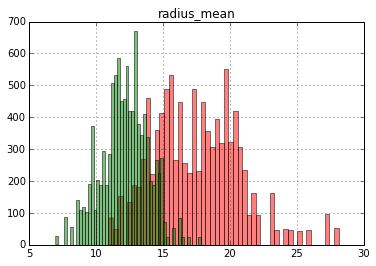

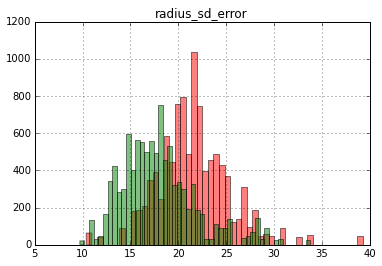

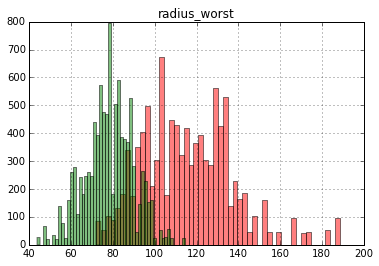

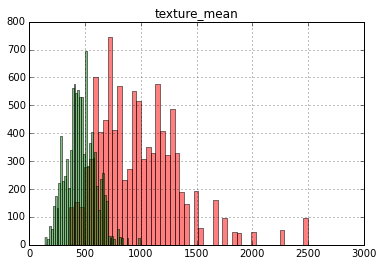

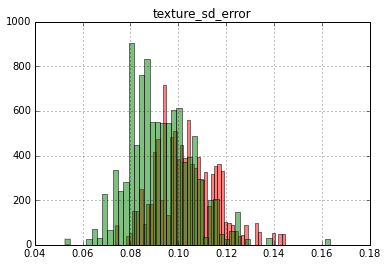

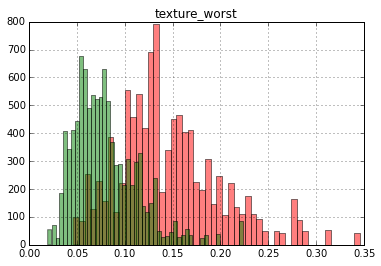

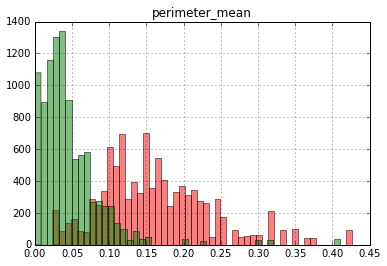

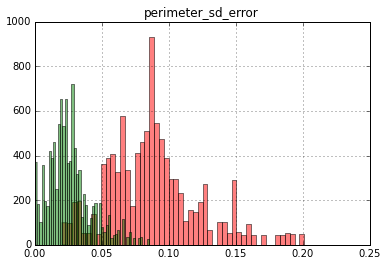

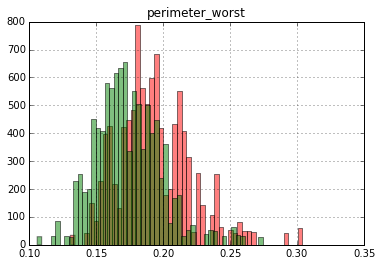

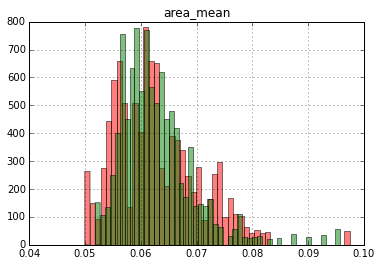

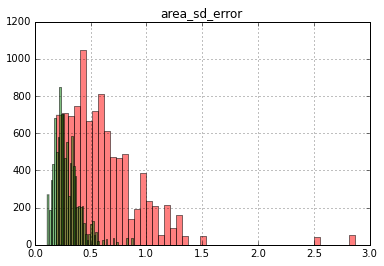

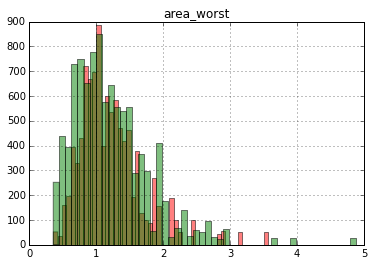

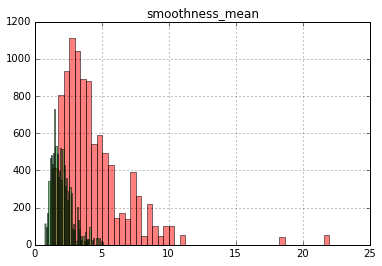

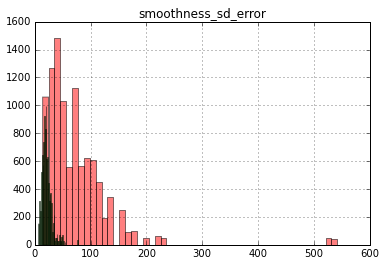

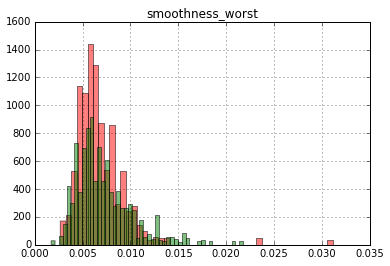

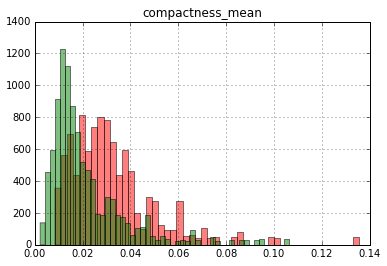

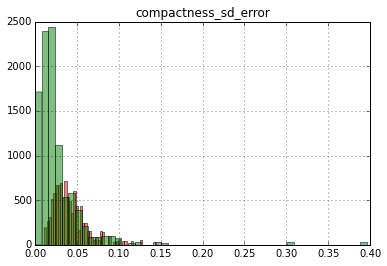

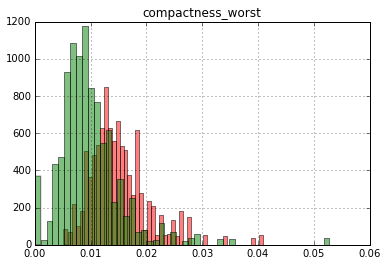

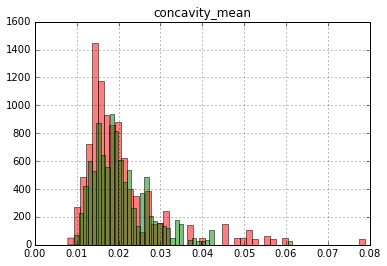

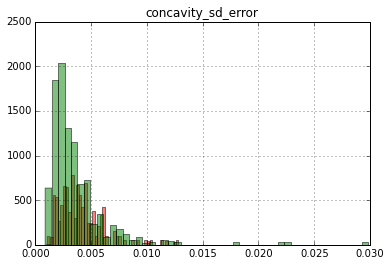

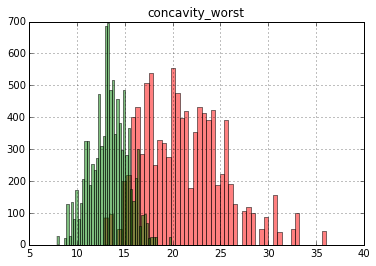

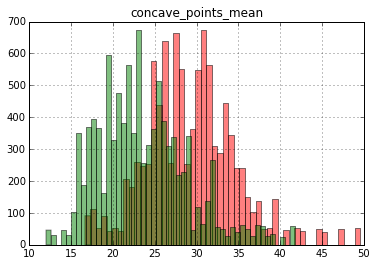

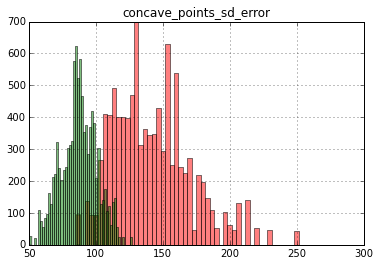

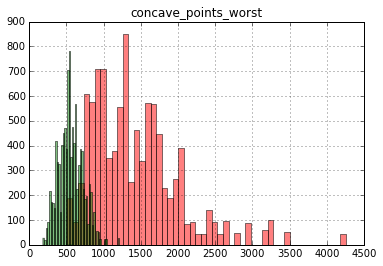

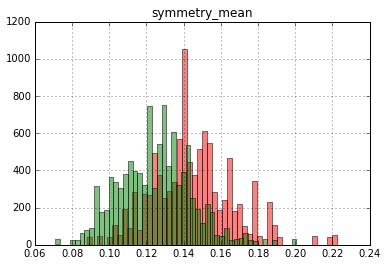

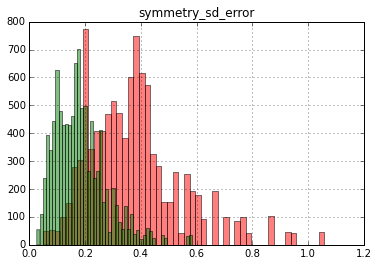

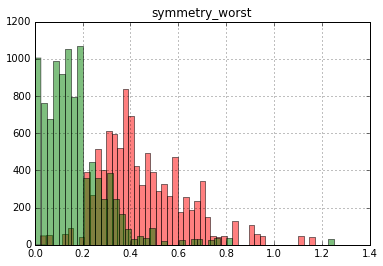

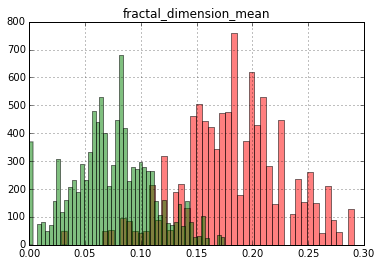

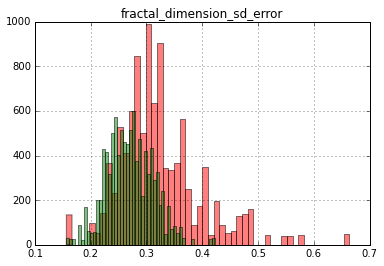

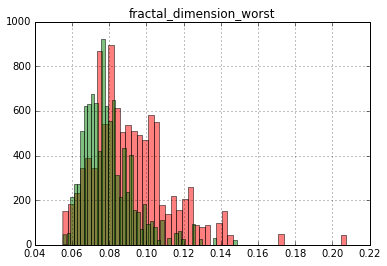

In [13]:
for feature in bcBoots.columns:
    if feature in ("ID","diagnosis"):
        continue
    plt.figure()
    plt.title(feature)
    exec("bcBoots[bcBoots.diagnosis=='M']."+feature+".hist( bins=50,color='red',alpha=.5)")
    exec("bcBoots[bcBoots.diagnosis=='B']."+feature+".hist( bins=50,color='green',alpha=.5)")


plt.show()

The following features show strong differences in distributions between diagnoses:
<li>fractal_dimension_mean</li>
<li>concave_points_worst</li>
<li>concave_points_sd_error</li>
<li>perimeter_sd_error</li>
<li>perimeter_mean</li>

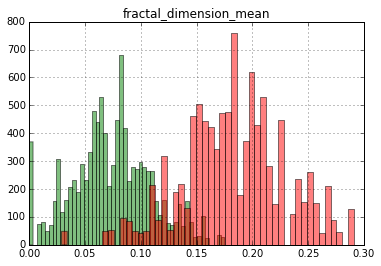

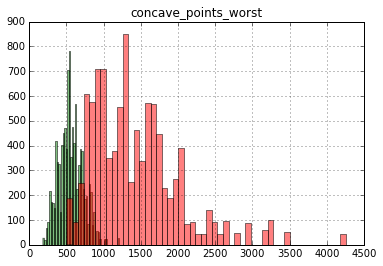

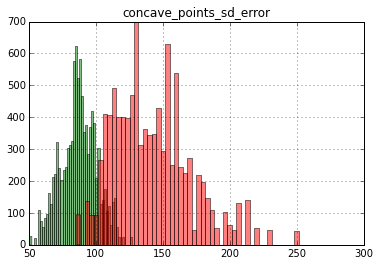

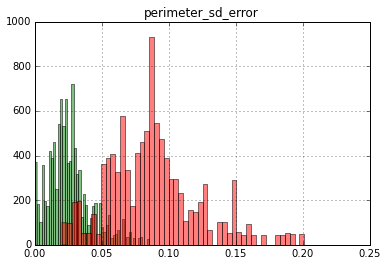

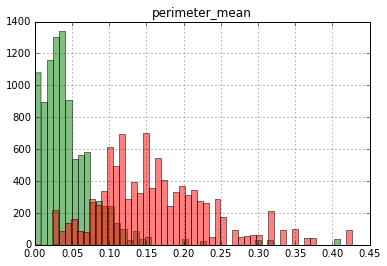

In [14]:
plt.figure()
plt.title('fractal_dimension_mean')
bcBoots[bcBoots.diagnosis=='B'].fractal_dimension_mean.hist( bins=50,color='green',alpha=.5)
bcBoots[bcBoots.diagnosis=='M'].fractal_dimension_mean.hist( bins=50,color='red',alpha=.5)

plt.figure()
plt.title('concave_points_worst')
bcBoots[bcBoots.diagnosis=='B'].concave_points_worst.hist( bins=50,color='green',alpha=.5)
bcBoots[bcBoots.diagnosis=='M'].concave_points_worst.hist( bins=50,color='red',alpha=.5)

plt.figure()
plt.title('concave_points_sd_error')
bcBoots[bcBoots.diagnosis=='B'].concave_points_sd_error.hist( bins=50,color='green',alpha=.5)
bcBoots[bcBoots.diagnosis=='M'].concave_points_sd_error.hist( bins=50,color='red',alpha=.5)

plt.figure()
plt.title('perimeter_sd_error')
bcBoots[bcBoots.diagnosis=='B'].perimeter_sd_error.hist( bins=50,color='green',alpha=.5)
bcBoots[bcBoots.diagnosis=='M'].perimeter_sd_error.hist( bins=50,color='red',alpha=.5)

plt.figure()
plt.title('perimeter_mean')
bcBoots[bcBoots.diagnosis=='B'].perimeter_mean.hist( bins=50,color='green',alpha=.5)
bcBoots[bcBoots.diagnosis=='M'].perimeter_mean.hist( bins=50,color='red',alpha=.5)





plt.show()

For each of these features, lower values correspond to benign cells, and higher values correspond to malignant cells. There is an overlap in each case, with slightly more of the distribution of malignant cells in the overlap region. (Note that here we are graphing the original values, not the normalized values that we calculated earlier. Those will come in later for our models.)

# Modeling

## Data Setup

Here, we will split our data into a training set (80%) and a test set (20%). While we're at it, we'll also check the ratios of Malignant to Benign data points in each new set to make sure our earlier randomization worked, and we have (reasonbly) balanced data:

In [15]:
train_data,train_labels = X_scaled[:450],bc_Y[:450]
test_data,test_labels = X_scaled[450:],bc_Y[450:]
print "Test data, Malignant ratio [%.2f]:\t%.0f out of %.0f" % (float(
        test_labels[test_labels.diagnosis_M==1].shape[0]/1./test_labels.shape[0]),
                                                                test_labels[test_labels.diagnosis_M==1].shape[0],
                                                                test_labels.shape[0])
print "Training data, Malignant ratio [%.2f]:\t%.0f out of %.0f" % (float(
        train_labels[train_labels.diagnosis_M==1].shape[0]/1./train_labels.shape[0]),
                                                                    train_labels[train_labels.diagnosis_M==1].shape[0],
                                                                    train_labels.shape[0])

Test data, Malignant ratio [0.43]:	51 out of 119
Training data, Malignant ratio [0.36]:	161 out of 450


## Linear Regression:

In [16]:
from sklearn.linear_model import LinearRegression

bc_LinReg = LinearRegression()
bc_LinReg.fit(train_data.values,train_labels.values)
LRpredictions = bc_LinReg.predict(test_data.values)
LRpredictions = (LRpredictions>.5)

print "SKLearn calc accuracy:\t\t\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(LRpredictions,test_labels))
print "SKLearn calc accuracy (true diag B):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(LRpredictions[test_labels.diagnosis_M.values==0],test_labels[test_labels.diagnosis_M.values==0]))
print "SKLearn calc accuracy (true diag M):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(LRpredictions[test_labels.diagnosis_M.values==1],test_labels[test_labels.diagnosis_M.values==1]))
print "SKLearn calc f1 score:\t%.2f" % sklearn.metrics.f1_score(LRpredictions,test_labels)


SKLearn calc accuracy:			94.12%
SKLearn calc accuracy (true diag B):	100.00%
SKLearn calc accuracy (true diag M):	86.27%
SKLearn calc f1 score:	0.93


### Accuracy: 94%

### Results:

Using a 0.5 cuttoff between Malignant and Benign, we get decent results from a Linear Regression. But, our model is not well balanced (accurate in both Malignant and Benign cases). Also, we may want to bias it to be more accurate in Malignant cases, since a false negative is more costly than a false positive in cancer detection.

Normally (to do a true optimization), we would need to separate out another subset of data, a development set, to optimize our model, then only use the remaining test set for a final score. But for simplicity, we can refer to the graphs we made earlier of different features, and notice that the (apparent) split in the data for different variables was at about a 1/3, in most cases, so it would be reasonable to use .33 as the cuttoff between Malignant and Benign, instead of .5:

### Optimization:

In [17]:
bc_LinReg = LinearRegression()
bc_LinReg.fit(train_data.values,train_labels.values)
LRpredictions = bc_LinReg.predict(test_data.values)
LRpredictions = (LRpredictions>.33)

print "SKLearn calc accuracy:\t\t\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(LRpredictions,test_labels))
print "SKLearn calc accuracy (true diag B):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(LRpredictions[test_labels.diagnosis_M.values==0],test_labels[test_labels.diagnosis_M.values==0]))
print "SKLearn calc accuracy (true diag M):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(LRpredictions[test_labels.diagnosis_M.values==1],test_labels[test_labels.diagnosis_M.values==1]))
print "SKLearn calc f1 score:\t%.2f" % sklearn.metrics.f1_score(LRpredictions,test_labels)



SKLearn calc accuracy:			95.80%
SKLearn calc accuracy (true diag B):	92.65%
SKLearn calc accuracy (true diag M):	100.00%
SKLearn calc f1 score:	0.95


This "optimized" model performs a little better overall, but more importantly it better balances the true positive and true negative accuracies, which is also reflected in the higher F-score (which is a composite of true positive and true negative accuracy). 

This model demonstrates using different scoring metrics, both in the case of unbalanced populations (which tend to overfit to the majority population), as well as looking specifically at true positive rates and true negative rates, especially in applications where they do not have equal cost. In this application, maximizing true positives (minimizing false negatives) is probably preferable over maximizing overall accuracy.

### Finding the Important Features:

In [18]:
coef_list = []
print "---CoEfficients---"
for i,coef in enumerate(bc_LinReg.coef_[0]):
    print "%d\t%.2f\t%s" % (i, coef,train_data.columns[i])
    coef_list.append(float(coef))

print "\n---Significant Features---"

maxindex = bc_LinReg.coef_.argmax()
print "Max Coeff:",train_data.columns[maxindex], ", @index[%.0f]:\t%.3f" % (maxindex,coef_list[maxindex])

coef_list[maxindex] = 0
maxindex = coef_list.index(max(coef_list))
print "Second Max Coeff:",train_data.columns[maxindex], ", @index[%.0f]:\t%.3f" % (maxindex,coef_list[maxindex])


minindex = bc_LinReg.coef_.argmin()
print "Min Coeff:",train_data.columns[minindex], ", @index[%.0f]:\t\t%.3f" % (minindex,coef_list[minindex])

coef_list[minindex] = 0
minindex = coef_list.index(min(coef_list))
print "Second Min Coeff:",train_data.columns[minindex], ", @index[%.0f]:\t\t%.3f" % (minindex,coef_list[minindex])

---CoEfficients---
0	-6.90	radius_mean
1	0.17	radius_sd_error
2	5.70	radius_worst
3	1.14	texture_mean
4	-0.00	texture_sd_error
5	-1.32	texture_worst
6	0.71	perimeter_mean
7	0.06	perimeter_sd_error
8	0.06	perimeter_worst
9	0.05	area_mean
10	1.04	area_sd_error
11	-0.04	area_worst
12	0.25	smoothness_mean
13	-1.28	smoothness_sd_error
14	0.46	smoothness_worst
15	-0.17	compactness_mean
16	-1.13	compactness_sd_error
17	0.46	compactness_worst
18	0.15	concavity_mean
19	-0.19	concavity_sd_error
20	6.76	concavity_worst
21	0.22	concave_points_mean
22	-1.89	concave_points_sd_error
23	-3.94	concave_points_worst
24	0.07	symmetry_mean
25	0.15	symmetry_sd_error
26	0.20	symmetry_worst
27	0.30	fractal_dimension_mean
28	0.10	fractal_dimension_sd_error
29	0.65	fractal_dimension_worst

---Significant Features---
Max Coeff: concavity_worst , @index[20]:	6.758
Second Max Coeff: radius_worst , @index[2]:	5.698
Min Coeff: radius_mean , @index[0]:		-6.903
Second Min Coeff: concave_points_worst , @index[23]:		-3.

Since we normalized the data prior to fitting it to any models, we can compare/contrast the coeefficients of the predictors to see which are the most significant. Above, we see the strongest positive and negative correlations in our model.

## Bernoulli Naive Bayes:

The Bernoulli Naive Bayes model will convert all features (predictors) to binary inputs. By default, it uses a 0.5 cuttoff to binarize the inputs.

In [19]:
from sklearn.naive_bayes import BernoulliNB

bc_BNB = BernoulliNB()

bc_BNB.fit(train_data.values,train_labels.values.ravel())
BNBpredictions = bc_BNB.predict(test_data.values)

print "SKLearn calc accuracy:\t\t\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(BNBpredictions,test_labels))
print "SKLearn calc accuracy (true diag B):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(BNBpredictions[test_labels.diagnosis_M.values==0],test_labels[test_labels.diagnosis_M.values==0]))
print "SKLearn calc accuracy (true diag M):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(BNBpredictions[test_labels.diagnosis_M.values==1],test_labels[test_labels.diagnosis_M.values==1]))
print "SKLearn calc f1 score:\t%.2f" % sklearn.metrics.f1_score(BNBpredictions,test_labels)


SKLearn calc accuracy:			57.14%
SKLearn calc accuracy (true diag B):	100.00%
SKLearn calc accuracy (true diag M):	0.00%
SKLearn calc f1 score:	0.00


/Users/denisvrdoljak/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/metrics/classification.py:960: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


### Accuracy: 57%

### Results:

Clearly, treating the predictors as potential binary inputs does not work very well, even with normalization. The model here heavily overfits to the negative (Benign) data, leading to poor overall and true positive (Malignant) accuracy. 

The default BNB model in SKLearn uses a 0.5 binarization level. But, as we saw in the histograms, the separation point between positive (Malignant) and negative (Benign) datapoints is not at the 0.5 level. Here, we can improve the model by adjusting the binarization level. In the LR model, we were adjusting the binarization on the final output. Here, we'll be adjusting the binarization on the inputs.

### Optimization:

In [20]:
bc_BNB = BernoulliNB(binarize=0.33)

bc_BNB.fit(train_data.values,train_labels.values.ravel())
predictions = bc_BNB.predict(test_data.values)

print "SKLearn calc accuracy:\t\t\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(predictions,test_labels))
print "SKLearn calc accuracy (true diag B):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(predictions[test_labels.diagnosis_M.values==0],test_labels[test_labels.diagnosis_M.values==0]))
print "SKLearn calc accuracy (true diag M):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(predictions[test_labels.diagnosis_M.values==1],test_labels[test_labels.diagnosis_M.values==1]))
print "SKLearn calc f1 score:\t%.2f" % sklearn.metrics.f1_score(predictions,test_labels)



SKLearn calc accuracy:			92.44%
SKLearn calc accuracy (true diag B):	98.53%
SKLearn calc accuracy (true diag M):	84.31%
SKLearn calc f1 score:	0.91


### Accuracy (Optimized): 92%

Simply adjusting the binarization level to a more appropriate binarization level increases the overall accuracy of the BNB model, as well as balancing the true positive and true negative accuracies. However, it still performs poorly. Part of the reason for this is because a BNB model applies the same binarization level to all inputs.

Another variation of NB, a Gaussian Naive Bayes (GNB), uses a separate Gaussian model for each input, allowing for different binarization levels for different inputs. But, the final results are about the same (only 2 percentage points better than BNB).

One of the problems with our models is that they presume indipendent inputs. In the case of this dataset, it's unlikely that the inputs are actually independent of each other. If we plot a couple of the features with the highest coefficients from the LR analysis against each other (below), we see strong correlations between pretictor variables. 

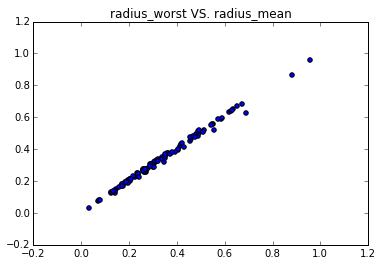

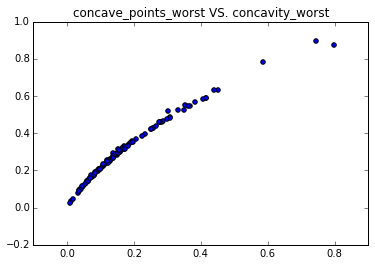

In [24]:
plt.scatter(test_data.radius_worst, test_data.radius_mean)
plt.title("radius_worst VS. radius_mean")
plt.show()

#plt.scatter(test_data.radius_worst, test_data.concave_points_worst)
#plt.title("radius_worst VS. concave_points_worst")
#plt.show()

plt.scatter(test_data.concave_points_worst, test_data.concavity_worst)
plt.title("concave_points_worst VS. concavity_worst")
plt.show()


### Finding the Important Features:

In [22]:
for i,feature_weight in enumerate(bc_BNB.feature_log_prob_.transpose()):
    print "%d\t%.2f\t%.2f\t%25s:\t%.2f" % (i,feature_weight[0],feature_weight[1], train_data.columns[i], (feature_weight[1] - feature_weight[0]))

0	-1.98	-0.12	              radius_mean:	1.86
1	-1.32	-0.31	          radius_sd_error:	1.00
2	-2.12	-0.12	             radius_worst:	1.99
3	-5.67	-0.59	             texture_mean:	5.08
4	-0.65	-0.14	         texture_sd_error:	0.50
5	-2.27	-0.52	            texture_worst:	1.75
6	-3.59	-0.55	           perimeter_mean:	3.04
7	-3.73	-0.34	       perimeter_sd_error:	3.39
8	-0.68	-0.23	          perimeter_worst:	0.45
9	-1.29	-1.20	                area_mean:	0.09
10	-5.67	-2.15	            area_sd_error:	3.52
11	-2.06	-2.45	               area_worst:	-0.39
12	-5.67	-2.32	          smoothness_mean:	3.35
13	-5.67	-3.48	      smoothness_sd_error:	2.19
14	-2.45	-3.01	         smoothness_worst:	-0.56
15	-2.45	-1.63	         compactness_mean:	0.83
16	-4.06	-4.40	     compactness_sd_error:	-0.34
17	-2.38	-1.33	        compactness_worst:	1.04
18	-2.63	-2.39	           concavity_mean:	0.24
19	-3.37	-3.71	       concavity_sd_error:	-0.34
20	-4.06	-0.17	          concavity_worst:	3.89
21	-0.92	-0.17	    

To get around the co-dependence problem, we'll need a model that can tolerate inter-dependence. Next, we'll try a Support Vector Machine (SVM) model.

## Support Vector Machines:

In [23]:
from sklearn.svm import SVC

bc_SVC = SVC(class_weight={1:1/.36,0:1/.64},kernel='linear')
bc_SVC.fit(train_data.values,train_labels.values.ravel())
SVCpredictions = bc_SVC.predict(test_data.values)

print "SKLearn calc accuracy:\t\t\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(SVCpredictions,test_labels))
print "SKLearn calc accuracy (true diag B):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(SVCpredictions[test_labels.diagnosis_M.values==0],test_labels[test_labels.diagnosis_M.values==0]))
print "SKLearn calc accuracy (true diag M):\t%.2f%%" % float(100*sklearn.metrics.accuracy_score(SVCpredictions[test_labels.diagnosis_M.values==1],test_labels[test_labels.diagnosis_M.values==1]))
print "SKLearn calc f1 score:\t%.2f" % sklearn.metrics.f1_score(SVCpredictions,test_labels)


SKLearn calc accuracy:			96.64%
SKLearn calc accuracy (true diag B):	98.53%
SKLearn calc accuracy (true diag M):	94.12%
SKLearn calc f1 score:	0.96


### Accuracy: 96%

The SVM model performs the best overall. SVM is a non-linear model. (Technically, it's a linear model in a higher dimensional space. But, when mapped to the lower dimensional space, it creates non-linear boundaries.) SVM's are one of a few models that can handle non-independent inputs reasonably well, which is why it's ideal for our problemset. Overall, it performs the best in terms of both accuracy and F-score.

### Overview:

#### Overview (Non-Technical)
These models show several different approaches to predicting data classification. The Linear Regression (LR) model treats the data as continuous and fits a simple linear regression to estimate the final value, which then needs to be binarized to represent Malignant or Benign at the output. Bernoulli Naive Bayes (NB) binarizes the inputs, then calculates the expected class (Malignant or Benign). The LR model performs better than the NB model because too much information is lost in binarizing on the input for non-categorical data. (NB models generally work better with discrete data, such as simple NLP or sentiment analysis (word is either present or not present) or with categorical inputs.)

Based on the LR model, the most important predictors are concavity_worst (positive correlation) and radius_mean (negative correlation). In NB, concave_points_worst, concavity_worst, and radius_worst appear to be the most important. Since radius_mean and radius_worst are tightly correlated, as are concavity_worst and concave_points_worst, it appears that (in generalized terms) Radius and Concavity are the most important predictors of Malignant vs. Benign. It also appears that there is a large amount of duplicate "information" within the data, in the form of non-independent features.

#### Improvements and Limitations (Technical)
A limitations of the analysis here, is in the optimization. A true optimization would split the test data further into test and dev data. The optimization would be done with the dev data, using something like a GridSearch() to find each model's respective parameter(s); and, the test data would only be used once for the final scoring. For simplicity, this analysis just estimates a "better than baseline" optimization based on prior knowledge/histogram analysis, as opposed to identifying the ideal optimization.

An expected limitation was the uneven class sizes; however, even with bootstrap upsampling (not show here), the improvement in accuracies would be negligable (2% on the lesser optimized class, and sometimes no improvement). We did compensate for this unbalance by adjusting the binariztion levels for LR and NB, and by putting the weights into the SVM model, so it wasn't much of an issue.

Another concern is overfitting due to non-independent features, especially in the case of the majority class. A potential improvement for this would be to group the variables by category, and test which ones add more information when added to the model. For instance, above we can see that radius_mean and radius_worst are almost perfectly linearly correlated, so having both in the model does little to improve its performance.

Since the SVM model shows the most promise in both its overall accuracy and its F-score (measure of balance and accuracie), a further improvement may be to use a kernal method and write better loss function for the data. This would also allow the model to become non-linear (depending on the function)